image    
[food] : 5000      
[interior] : 5000    
[exterior] : 5000    
    
활성함수
1) Conv2D(32, kernel_size=3, activation='relu)
2) Dropout(0.5)
3) MaxPooling2D(pool_size=2)

4) Conv2D(64, kernel_size=3, activation='relu')
5) MaxPooling2D(pool_size=2)

6) Dense(10,activation='selu')
7) Flatten()

----
## 이거 실패작 
: 분류 잘안되어있음

In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential, load_model

from sklearn.model_selection import train_test_split

np.random.seed(1)

In [3]:

train_images = []       
train_labels = []
shape = (300,300)  
train_path = './image'
for filename in os.listdir('./image'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))

        # Spliting file names and storing the labels for image in list
        train_labels.append(filename[0])

        # Resize all images to a specific shape
        img = cv2.resize(img,shape)

        train_images.append(img)

# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values
print(train_labels.shape)
print(train_labels)

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_test,y_train,y_test = train_test_split(train_images,train_labels,test_size=0.3,random_state=42)



(15000, 3)
[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [4]:
test_images = []
test_labels = []
shape = (300,300)
test_path = './image'

for filename in os.listdir('./image'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        
        # Spliting file names and storing the labels for image in list
        test_labels.append(filename[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        test_images.append(img)
        
# Converting test_images to array
test_images = np.array(test_images)


[1 0 0]


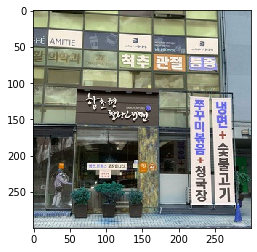

In [68]:
plt.imshow(x_test[654])
print(y_test[654])


[0 1 0]


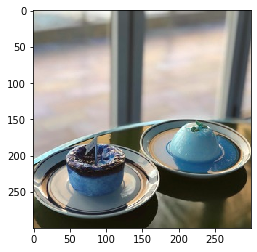

In [69]:
plt.imshow(x_train[654])
print(y_train[654])

In [5]:
def train_cnn_model():
# Creating a Sequential model
    model= Sequential()
    model.add(Conv2D(kernel_size=(3,3), filters=32, activation='selu', input_shape=(300,300,3,)))
#     model.add(Conv2D(filters=30,kernel_size = (3,3),activation='selu'))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(filters=30,kernel_size = (3,3),activation='selu'))
    model.add(MaxPool2D(2,2))
#     model.add(Conv2D(filters=30,kernel_size = (3,3),activation='selu'))

    model.add(Flatten())

    model.add(Dense(20,activation='relu'))
    model.add(Dense(15,activation='selu'))
    model.add(Dense(3,activation = 'softmax'))

    model.compile(optimizer= 'adam', loss='categorical_crossentropy',metrics=['accuracy'])

    # Model Summary
    model.summary()

    # Training the model
    history = model.fit(x_train,y_train, validation_data=(x_test, y_test), batch_size=100, epochs = 4)
    model.save('model-2018-2')
    return model, history

In [7]:
train_cnn_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 30)      8670      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 30)        0         
_________________________________________________________________
flatten (Flatten)            (None, 159870)            0         
_________________________________________________________________
dense (Dense)                (None, 20)                3197420   
_________________________________________________________________
dense_1 (Dense)              (None, 15)                3

NameError: name 'history' is not defined

In [49]:
def plot_loss_curve(history):
    plt.figure(figsize = (5,3))
    
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train','test'], loc = 'upper right')
    plt.show
    
plot_loss_curve(history)
print(history.history)
print('train loss =', history.history['loss'][-1])
print('validation loss =', history.history['val_loss'][-1])

NameError: name 'history' is not defined

In [39]:
def predict_image_sample(model,X_test, y_test, test_id= -1 ):
    if test_id <0 :
        from random import randrange
        test_sample_id = randrange(10000)
    else:
        test_sample_id = test_id
    
    test_image =test_images[test_sample_id]
#     plt.imshow(test_images[123])

    
    test_image = test_image.reshape(1,300,300,3)
    
    y_actual = y_test[test_sample_id].tolist().index(1)
    print('y_actual number = ', y_actual)
    
    y_pred = model.predict(test_image)
    print("y_pred = ", y_pred)
    y_pred_num = np.argmax(y_pred, axis = 1)[0]
    print('y_pred number = ', y_pred_num)
    return y_actual , y_pred_num


y_actual number =  2
y_pred =  [[0.7518666  0.01284904 0.2352844 ]]
y_pred number =  0
y_actual number =  1
y_pred =  [[9.2310250e-01 2.3197565e-04 7.6665580e-02]]
y_pred number =  0
y_actual number =  2
y_pred =  [[0.6252716  0.05232221 0.3224061 ]]
y_pred number =  0
y_actual number =  0
y_pred =  [[9.4546330e-01 7.4198790e-05 5.4462526e-02]]
y_pred number =  0
y_actual number =  1
y_pred =  [[0.5436115  0.09874734 0.35764116]]
y_pred number =  0
y_actual number =  1
y_pred =  [[9.5703459e-01 3.3901302e-05 4.2931538e-02]]
y_pred number =  0
y_actual number =  0
y_pred =  [[9.4761306e-01 6.4991174e-05 5.2322034e-02]]
y_pred number =  0
y_actual number =  0
y_pred =  [[0.5000093  0.1309438  0.36904684]]
y_pred number =  0
y_actual number =  0
y_pred =  [[0.86639977 0.00150354 0.13209677]]
y_pred number =  0
y_actual number =  0
y_pred =  [[0.28862244 0.30999598 0.40138164]]
y_pred number =  2
y_actual number =  0
y_pred =  [[9.6535701e-01 1.6788303e-05 3.4626193e-02]]
y_pred number =  

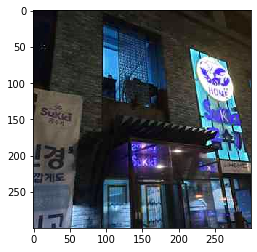

In [48]:
if __name__ == '__main__' :
    n = 0
    model = load_model('model-201814132')

    for i in range(30):
        y_actual , y_pred_num = predict_image_sample(model,x_test, y_test,test_id = i)
        
        if y_actual == y_pred_num:
            n += 1 
        else : pass
print('전체 횟수 :', i,' '*10,'예측 성공 횟수',n,'\n'*2 ,'정확도 = ', (n/i)*100)